In [1]:
import numpy as np
from otimo import SecaoAurea, Gradiente, QuasiNewton, Newton

# Comparações entre os Métodos do Gradiente e Quasi-Newton

## Função Perm 0, N, $\beta$

\begin{equation}
    \min\limits_{\mathbf{x}} f(\mathbf{x}) = \sum\limits_{i=1}^N\left(\sum\limits_{j=1}^N (j+\beta) \left(x^i_j - \frac{1}{j^i}\right) \right)^2
\end{equation}

onde $N$ é o número de variáveis (dimensão). O mínimo global é $f(\mathbf{x^*}) = 0$ em que $\mathbf{x^*} = <1, \frac{1}{2}, \frac{1}{3}, \cdots, \frac{1}{N}>$.

MÉTODO DO GRADIENTE
Solução ótima: [1.00111481 0.4984368 ]
Número de iterações: 22
Número de avaliações: 378


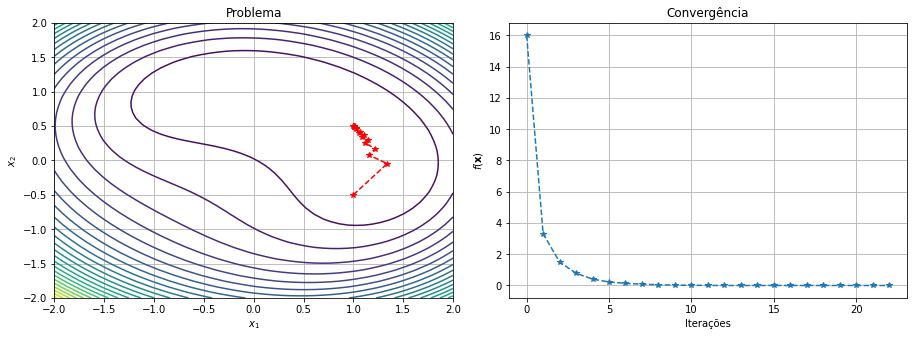

MÉTODO QUASI-NEWTON
Solução ótima: [1.00000364 0.50000069]
Número de iterações: 6
Número de avaliações: 168


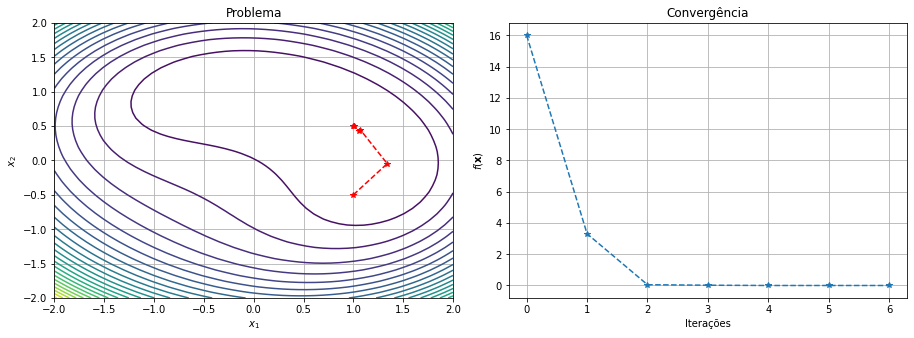

In [2]:
# Definição da função objetivo
def perm(x):
    beta = 2.
    fx = 0.
    for i in range(1, x.size+1):
        aux = 0
        for j in range(1, x.size+1):
            aux += (j + beta)*(x[j-1]**i - 1/j**i)
        fx += aux**2
    return fx

# Parâmetros gerais
x0 = np.array([1., -.5]) # Ponto inicial
unidimensional = SecaoAurea(precisao=1e-3) # Método unidimensional
maxit = 1000 # Número máximo de iterações
maxaval = 10000 # Número máximo de avaliações
precisao = 1e-2 # Norma mínima do gradiente

# Executa os dois algoritmos
gradiente = Gradiente(unidimensional, maxit=maxit, maxaval=maxaval,
                      precisao=precisao).resolva(perm, x0)
quasinewton = QuasiNewton(unidimensional, qsi=.5, maxit=maxit, maxaval=maxaval,
                          precisao=precisao).resolva(perm, x0)

# Resultado do Método do Gradiente
print("MÉTODO DO GRADIENTE")
print(gradiente)
gradiente.resultados(perm, [-2, 2], [-2, 2])

# Resultado do Método Quasi-Newton
print("MÉTODO QUASI-NEWTON")
print(quasinewton)
quasinewton.resultados(perm, [-2, 2], [-2, 2])

## Função Goldstein-Price

\begin{align}
    \min\limits_{\mathbf{x}} f(\mathbf{x}) &=& [(1 + (x_1+x_2+1)^2\times(19-14x_1+3x_1^2-14x_2+6x_1x_2+3x_2^2)) \\ &\times& (30 + (2x_1-3x_2)^2\times(18-32x_1+12x_1^2+48x_2-36x_1x_2+27x_2^2))]
\end{align}

O mínimo global é $f(\mathbf{x^*}) = 3$ em que $\mathbf{x^*} = <0, -1>$.

MÉTODO DO GRADIENTE
Solução ótima: [-5.66802603e-06 -1.00000055e+00]
Número de iterações: 37
Número de avaliações: 707


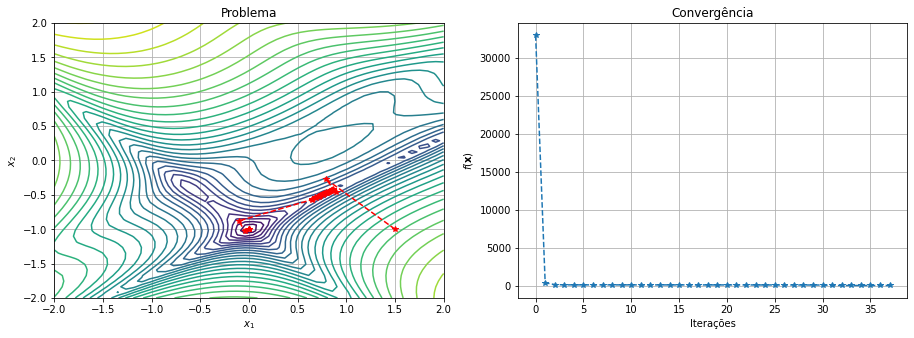

MÉTODO QUASI-NEWTON
Solução ótima: [-6.13708699e-07 -9.99999719e-01]
Número de iterações: 5
Número de avaliações: 241


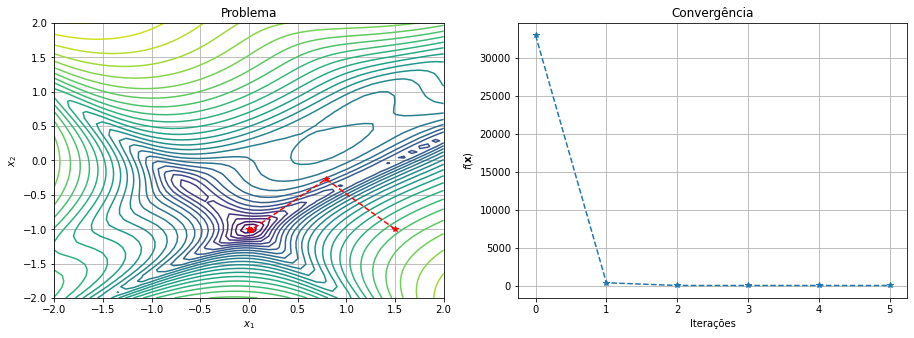

In [3]:
# Definição da função objetivo
def goldsteinprice(x):
    x1, x2 = x[0], x[1]
    fx = ((1 + (x1+x2+1)**2*(19-14*x1+3*x1**2-14*x2+6*x1*x2+3*x2**2))
          * (30 + (2*x1-3*x2)**2*(18-32*x1+12*x1**2+48*x2-36*x1*x2+27*x2**2)))
    return fx

# Parâmetros gerais
x0 = np.array([1.5, -1.]) # Ponto inicial
unidimensional = SecaoAurea(precisao=1e-4, passo=1e-6) # Método unidimensional
maxit = 1000 # Número máximo de iterações
maxaval = 10000 # Número máximo de avaliações
precisao = 1e-2 # Norma mínima do gradiente

# Executa os dois algoritmos
gradiente = Gradiente(unidimensional, maxit=maxit, maxaval=maxaval,
                      precisao=precisao).resolva(goldsteinprice, x0)
quasinewton = QuasiNewton(unidimensional, qsi=.5, maxit=maxit, maxaval=maxaval,
                          precisao=precisao).resolva(goldsteinprice, x0)

def goldsteinprice2(x):
    return np.log10(goldsteinprice(x)+1)

# Resultado do Método do Gradiente
print("MÉTODO DO GRADIENTE")
print(gradiente)
gradiente.resultados(goldsteinprice2, [-2, 2], [-2, 2])

# Resultado do Método Quasi-Newton
print("MÉTODO QUASI-NEWTON")
print(quasinewton)
quasinewton.resultados(goldsteinprice2, [-2, 2], [-2, 2])